# kNN classifier example implemented in Python

**Classification**

It is the process of predicting the class of given data points.

* Input: A training set of tuples - a list of descriptors and chosen class label attribute.
* Output: The model (classifier) that assigns a class to each tuple based on the descriptors' values.

**kNN algorithm**

The kNN-algorithm consists of three steps:
1. Calculating the distance between a test set and the training set. The most common is the Euclidean distance. 
2. Finding the nearest neighbours on the distance criterion.
3. Classifying point from the test set. The predicted class of test point is set equal to the most frequent class among k nearest training points.

Let's start by importing the necessary modules.

In [2]:
import pandas as pd
from math import sqrt

We define class Point.The object of `class Point` has two attributes coordinates and label. 

Then, we define a method that calculates the distance between the test point and all other points in the training set.

In [3]:
class Point:
    
    def __init__(self, coordinates, label):
        self.coordinates = coordinates
        self.label = label
    
    def get_coordinates(self):
        return self.coordinates
    
    def get_label(self):
        return self.label
    
    def distance(self, point):
        return sqrt(sum([(x - y) ** 2 for x, y in zip(self.coordinates, point.coordinates)]))
    
    def __str__(self):
        return str(self.coordinates) + " " + str(self.label)

In the init function we define the value of hyperparameter k (the number of nearest neighbors). Choosing the value of k is not a part of the learning process. We've set `k=7`.

The kNN algorithm does not build any model with the training set. We store the training sample to use it in the prediction stage.

The method `classify` create the list that stores the k nearest neigbours. Then, we create a list of labels for neigbours and choose the most frequent class label among the k closest neigbours.

In [4]:
class Model:
    
    def __init__(self, k=7):
        self.training_set = None
        self.k = k
    
    def train(self, training_set):
        self.training_set = training_set
    
    def classify(self, test_set):
        
        res = []
        
        for point in test_set:
            neighbours = sorted(self.training_set, key = lambda x: x.distance(point))[0:self.k]
            labels = [x.label for x in neighbours]
            prediction = max(labels, key = labels.count)
            res += [(point, prediction)] 
        return res


Finally, we construct the confusion matrix to check the performance of the algorithm. Each row of the matrix represents the instances in a predicted class and each column represents the instances in an actual class.

In [5]:
class ConfusionMatrix:
    
    def __init__(self, predictions):
        self.predictions = predictions
        
    def __str__(self):
        
        rows = sorted(set([x[0].label for x in self.predictions]))
        columns = sorted(set([x[1] for x in self.predictions]))
        column_width = 10
        
        res = " ".join([str(x).center(column_width) for x in columns]) + "\n"
        for row in rows:
            for column in columns:
                res += str(sum([1 for x in self.predictions if x[0].label == row and x[1] == column])).center(column_width)
                res += " "
            res += str(row).center(column_width) + "\n"
        return res
            

Let's test out the model. First, we load two data sets: traing set and test set.

In [58]:
training_set = [Point(x[0:-1], x[-1]) for x in pd.read_csv("data/training_set.csv").values.tolist()]
test_set     = [Point(x[0:-1], x[-1]) for x in pd.read_csv("data/test_set.csv").values.tolist()]

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', category=UserWarning)
%matplotlib inline

In [110]:
df = pd.read_csv("data/training_set.csv")
df.head()

,x1,x2,x3,x4,label
0,4.9,3.0,1.4,0.2,label1
1,5.7,2.8,4.1,1.3,label2
2,7.0,3.2,4.7,1.4,label2
3,5.1,3.7,1.5,0.4,label1
4,5.6,2.7,4.2,1.3,label2


In [111]:
df.describe()

,x1,x2,x3,x4
count,136.000000,136.000000,136.000000,136.000000
mean,5.854412,3.055147,3.786029,1.211765
std,0.814213,0.445192,1.753438,0.759050
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 432x288 with 0 Axes>

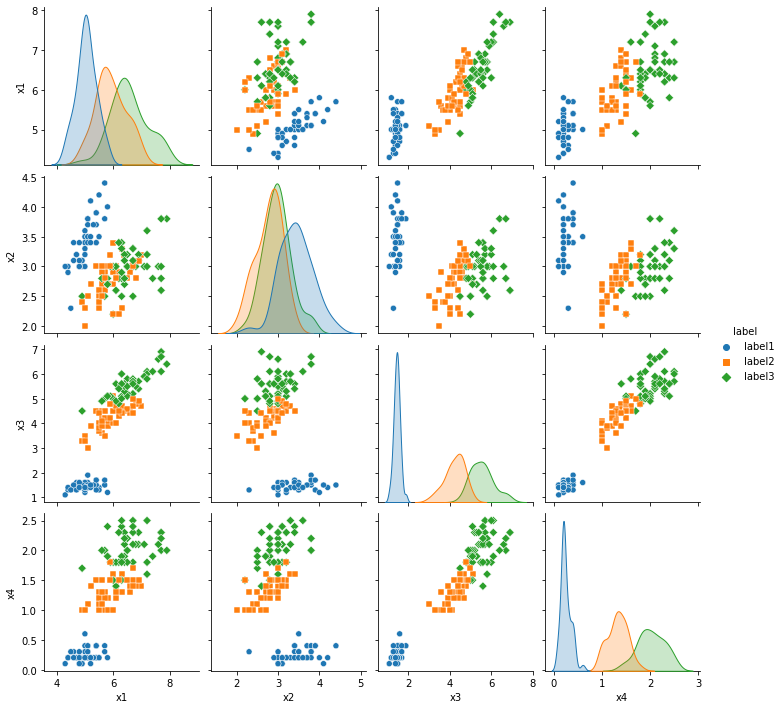

In [108]:
plt.figure()
sns.pairplot(df, hue = "label", markers=["o", "s", "D"])
plt.show()

<Figure size 432x288 with 0 Axes>

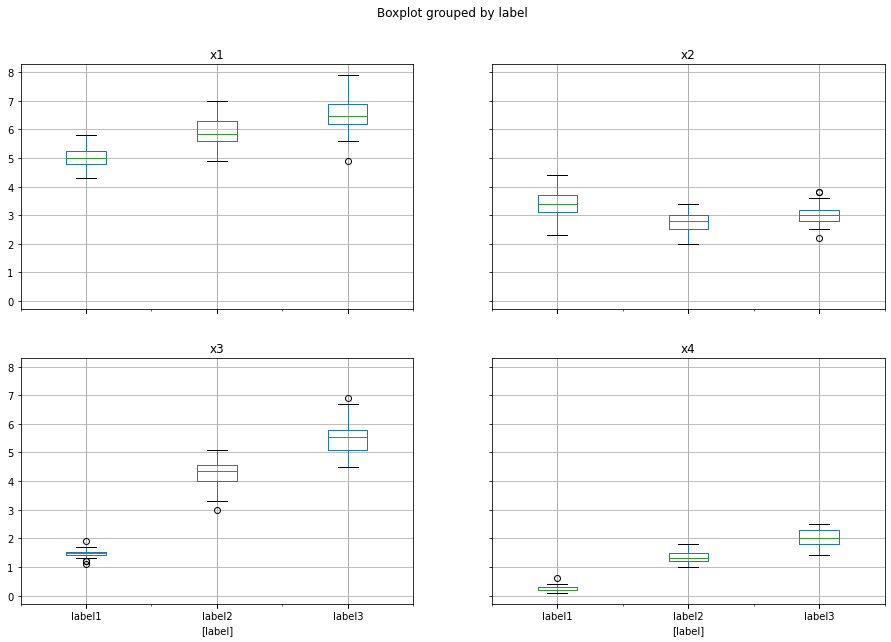

In [109]:
plt.figure()
df.boxplot(by="label", figsize=(15, 10))
plt.show()

We call `classify` method from `class model`.

In [55]:
model = Model()
model.train(training_set)
predictions = model.classify(test_set)

Let's print the confusion matrix to check the accuracy of our model.

In [56]:
print(ConfusionMatrix(predictions))

  label1     label2     label3  
    6          0          0        label1  
    0          3          1        label2  
    0          0          4        label3  



In [57]:
accuracy = sum([1 for i in predictions if i[0].label == i[1]])/len(predictions)

print("Total accuracy: "'{percent:.2%}'.format(percent=accuracy)) 

Total accuracy: 92.86%
